In [58]:
# # Credit: sentdex
# # link: https://pythonprogramming.net/3d-convolutional-neural-network-machine-learning-tutorial/
# import os
# import pandas as pd

# data_dir = 'data/demo/nodule/'
# patients = os.listdir(data_dir)
# labels_df = pd.read_csv('data/demo/train_data.csv',index_col=0)

# labels_df.head()

In [59]:
# len(patients)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [60]:
# for patient in patients[:8]:
#     patient_name = patient[0:-4]
#     label = labels_df.get_value(patient_name, 'lable')
#     path = data_dir + patient
#     # a couple great 1-liners from: https://www.kaggle.com/gzuidhof/data-science-bowl-2017/full-preprocessing-tutorial
#     scan = np.load(path)
#     print(scan['voxel'],label)
#     plt.figure()
#     plt.subplot(1,2,1)
#     plt.imshow(scan['voxel'][37])
#     plt.subplot(1,2,2)
#     plt.imshow(scan['seg'][37])

In [61]:
# much_data = []
# for num, patient in enumerate(patients):
#     patient_name = patient[0:-4]
#     label = labels_df.get_value(patient_name, 'lable')
#     path = data_dir + patient
#     img_data = np.load(path)
#     voxel = img_data['voxel'].astype(np.int32)
# #     plt.imshow(voxel[50])
# #     print(label)
#     much_data.append([voxel,label])
    
# np.save('muchdata', much_data)

 Codes work below, Credit: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
import matplotlib.pyplot as plt
import numpy as np

### 怎么把数据我现在的数据变成需要的数据？

- 先要理清思路，现在的数据长什么样子?
source https://blog.csdn.net/DaVinciL/article/details/78793067 介绍了CIFAR数据集
- 现在的网络每层的输入输出是什么样子？

In [62]:
# transform = transforms.Compose(
#     [transforms.ToTensor(),
#      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# trainset = torchvision.datasets.CIFAR10(root='./data_test', train=True,
#                                         download=True, transform=transform)
# trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
#                                           shuffle=True, num_workers=2)

# testset = torchvision.datasets.CIFAR10(root='./data_test', train=False,
#                                        download=True, transform=transform)
# testloader = torch.utils.data.DataLoader(testset, batch_size=4,
#                                          shuffle=False, num_workers=2)

# classes = ('plane', 'car', 'bird', 'cat',
#            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [63]:
# def imshow(img):
#     img = img / 2 + 0.5     # unnormalize
#     npimg = img.numpy()
#     plt.imshow(np.transpose(npimg, (1, 2, 0)))
#     plt.show()


# # get some random training images
# dataiter = iter(trainloader)
# images, labels = dataiter.next()

# # show images
# imshow(torchvision.utils.make_grid(images))
# # print labels
# print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [64]:
# for x,y in enumerate(trainloader,0):
#     print(x)
#     inputs, labels = y
#     if x==2:
#         break

In [65]:
# r = inputs[3][0].numpy()
# g = inputs[3][1].numpy()
# b = inputs[3][2].numpy()
# # inputs 输入进来 格式为：4个图片，y对应4个标签
# # 每张图片又有3个通道，对应着rgb
# # photo = r+g+b
# photo = np.concatenate([r,g,b],-1)
# # photo.astype(np.uint8)
# print(np.shape(photo))
# plt.imshow(photo)
# # plt.imshow(inputs[3].numpy())

In [66]:
# labels[3]

### 这个网络可能变成3d的吗？

In [4]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv3d(in_channels=1, out_channels=5, kernel_size=17) # input_channel:1; output_channel(#filter):10; kernel_size: 10*10
        self.pool = nn.MaxPool3d(2, 2)
        self.conv2 = nn.Conv3d(in_channels=5, out_channels=10, kernel_size=17) # input_channel:10; output_channel(#filter):20; kernel_size: 10*10
        self.fc1 = nn.Linear(10 * 13 * 13 * 13, 16000)
        self.fc2 = nn.Linear(16000, 8000)
        self.fc3 = nn.Linear(8000, 2000)
        self.fc4 = nn.Linear(2000, 200)
        self.fc5 = nn.Linear(200, 80)
        self.fc6 = nn.Linear(80, 10)
        self.fc7 = nn.Linear(10, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 10 * 13 * 13 * 13)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = self.fc7(x)
        return x


net = Net()

In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [7]:
# credit: cheez & Matthew Kerian
# link: https://stackoverflow.com/questions/55890813/how-to-fix-object-arrays-cannot-be-loaded-when-allow-pickle-false-for-imdb-loa/56243777
'''use older to successfully load the data:'''
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

data_ineed = np.load('muchdata.npy')

# restore np.load for future normal usage
np.load = np_load_old

# If you are working with the basic sample data, use maybe 2 instead of 100 here... you don't have enough data to really do this
train_data = data_ineed[:-60]
validation_data = data_ineed[-60:]

In [39]:
# for i,data in enumerate(train_data,0):
#     print(i)
#     if i==2:
#         break

In [40]:
# inputs,label = data
# # print(label)
# # print(inputs)

In [41]:
# test_data = torch.from_numpy(train_data[0][0])
# ineed = test_data[37].numpy()
# plt.imshow(ineed)
# label = train_data[0][1]
# print(label)

In [8]:
for epoch in range(4):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_data, 0):
        # get the inputs; data is a list of [inputs, labels]
        # inputs: tensor(100*(100*100)), label
        inputs_numpy, labels_numpy = data
        inputs = torch.from_numpy(inputs_numpy)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

RuntimeError: Expected 5-dimensional input for 5-dimensional weight 5 1 17 17 17, but got 3-dimensional input of size [100, 100, 100] instead

In [12]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

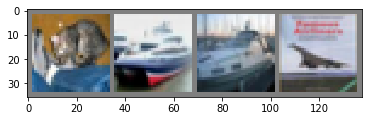

GroundTruth:    cat  ship  ship plane


In [13]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))